# Hands-on exercise 2
### Problem: Variational quantum eigensolver

In this exercise you will learn about the different components of the variational quantum eigensolver (VQE).

In [1]:
from time import perf_counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP, SPSA
from tqdm import tqdm

### A working VQE example

Qiskit ships with all components required to implement a customized VQE. Let us start by creating a simple **ansatz**.

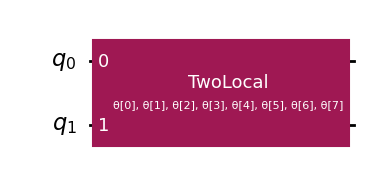

In [2]:
num_qubits = 2
ansatz = TwoLocal(num_qubits, "rx", "cx")
ansatz.draw("mpl")

Let's draw the ansatz so we can see it's a `QuantumCircuit` where θ\[0\] through θ\[7\] will be the parameters that are varied as VQE optimizer finds the minimum eigenvalue. We'll come back to the parameters later in a working example below.

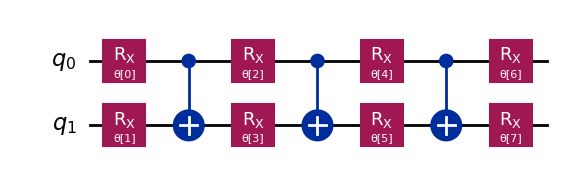

In [3]:
ansatz.decompose().draw("mpl")

Next, we need to select a classical **optimizer** and set the maximum number of iterations. The Qiskit [Algorithms](https://github.com/qiskit-community/qiskit-algorithms) library provides useful APIs for this purpose. Take a look at its [VQE](https://qiskit-community.github.io/qiskit-algorithms/stubs/qiskit_algorithms.VQE.html) implementation and at the [Optimizers](https://qiskit-community.github.io/qiskit-algorithms/apidocs/qiskit_algorithms.optimizers.html) module. For now, we'll go ahead with the [Sequential Least SQuares Programming optimizer](https://qiskit-community.github.io/qiskit-algorithms/stubs/qiskit_algorithms.optimizers.SLSQP.html).

In [4]:
optimizer = SLSQP(maxiter=1000)

Lastly, we need to select an **estimator** for evaluating the expectation values. You may ignore the warning created by the cell below.

In [5]:
estimator = Estimator()

/tmp/ipykernel_5594/3535533691.py:1: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


This estimator uses an exact, statevector simulation to evaluate the expectation values. We can also use a shot-based and noisy simulators or real backends instead. For more information of the simulators you can check out [Qiskit Aer Primitives](https://qiskit.github.io/qiskit-aer/apidocs/aer_primitives.html) and for the actual hardware [Qiskit IBM Runtime](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime).

With all the ingredients ready, we can now instantiate the VQE:

In [6]:
vqe = VQE(estimator, ansatz, SPSA(maxiter=100))

We are now ready to define our problem Hamiltonian for which we want to compute the minimal eigenvalue. In this example, the values come from a chemistry problem of finding the ground energy state of a $H_2$ molecule. Let's start be giving the decomposition into Pauli strings explicitly:

In [7]:
H2_op = SparsePauliOp.from_list(
    [
        ("II", -1.052373245772859),
        ("IZ", 0.39793742484318045),
        ("ZI", -0.39793742484318045),
        ("ZZ", -0.01128010425623538),
        ("XX", 0.18093119978423156),
    ]
)

Now we have everything at hand to run the VQE and print the result object it returns

In [8]:
vqe = VQE(estimator, ansatz, optimizer)

result = vqe.compute_minimum_eigenvalue(H2_op)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 75,
    'eigenvalue': np.float64(-1.8369679898186777),
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f331be93b60>,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): np.float64(-3.6492503886571646),
                              ParameterVectorElement(θ[1]): np.float64(-3.6882253301582497),
                              ParameterVectorElement(θ[2]): np.float64(-1.7590392926504603),
                              ParameterVectorElement(θ[3]): np.float64(4.02256627779272),
                              ParameterVectorElement(θ[4]): np.float64(-2.6339718339201825),
                              ParameterVectorElement(θ[6]): np.float64(4.900569028594457),
                              ParameterVectorElement(θ[7]): np.float64(-4.899468311055222),
                              ParameterVectorElement(θ[5]): np.float64(4.565107444890668)},
    'optimal_point': array([-3.64925039, -3

Let's switch to a shot-based estimator (with that you can easily switch to real hardware) and another optimizer

In [9]:
from qiskit_algorithms.optimizers import SPSA

estimator = Estimator(options={"shots": 1000})

vqe.estimator = estimator
vqe.optimizer = SPSA(maxiter=100)
result = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(result)

/tmp/ipykernel_5594/964561171.py:3: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator(options={"shots": 1000})


{   'aux_operators_evaluated': None,
    'cost_function_evals': 200,
    'eigenvalue': np.float64(-1.8388049530686554),
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f331a96bf80>,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): np.float64(4.7551293258974425),
                              ParameterVectorElement(θ[1]): np.float64(2.7596237863150606),
                              ParameterVectorElement(θ[2]): np.float64(0.6347881536383759),
                              ParameterVectorElement(θ[3]): np.float64(2.2136387172050713),
                              ParameterVectorElement(θ[4]): np.float64(-1.6256090891995274),
                              ParameterVectorElement(θ[6]): np.float64(-0.6171106948037295),
                              ParameterVectorElement(θ[7]): np.float64(0.40982261750527227),
                              ParameterVectorElement(θ[5]): np.float64(4.029519589710378)},
    'optimal_point': array([ 4.75512933,

### Assignment 1 - Optimizers

Experiment with at least 5 different optimizers from the [`qiskit_algorithms.optimizers`](https://qiskit-community.github.io/qiskit-algorithms/apidocs/qiskit_algorithms.optimizers.html) module. By filling in the code two cells  below. Make sure that the parameters of each optimizer (i.e., number of iterations) are fair.

In [10]:
def benchmark(
    optimizers,
    ansatz,
    operator,
    num_reps=5,
    estimator=Estimator(options={"shots": 1000}),
):
    result_dict = {"optimizer": [], "energy": [], "counts": [], "time": []}
    for _ in range(num_reps):
        for optimizer in tqdm(optimizers):
            ansatz = TwoLocal(num_qubits, "ry", "cz")

            counts = []
            values = []

            def store_intermediate_result(eval_count, parameters, mean, std):
                counts.append(eval_count)
                values.append(mean)

            vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
            start_time = perf_counter()
            result = vqe.compute_minimum_eigenvalue(operator=operator)
            end_time = perf_counter()
            result_dict["optimizer"].extend([type(optimizer).__name__] * len(counts))
            result_dict["time"].extend([end_time - start_time] * len(counts))
            result_dict["counts"].extend(counts)
            result_dict["energy"].extend(values)

    return result_dict

/tmp/ipykernel_5594/1068409605.py:6: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator=Estimator(options={"shots": 1000}),


In [11]:
# import your optimizers here!
optimizers = [
    # Your code here!    
]  

result_dict = benchmark(optimizers, TwoLocal(num_qubits, "rx", "cx"), H2_op)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


Now we can format all the data together and analyze how the different optimizers perform.

In [12]:
df = pd.DataFrame.from_dict(result_dict)
df

,optimizer,energy,counts,time


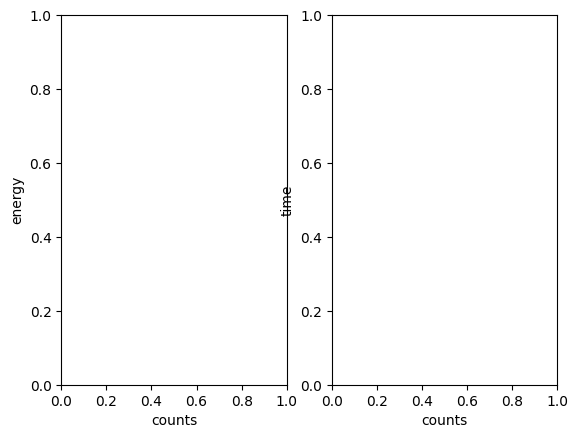

In [13]:
fig, ax = plt.subplots(1, 2)
sns.lineplot(data=df, x="counts", y="energy", hue="optimizer", errorbar="ci", ax=ax[0])
sns.lineplot(data=df, x="counts", y="time", hue="optimizer", errorbar="ci", ax=ax[1])

fig.show()

### Assignment 2 - Interpretation

Discuss the results from the plots produced by the two cell above. Which optimizers perform best? How do energy levels and the number of iterations compare? Does the locality of the optimizers matter?

Your answer here...

### Assignment 3 - Ansatz implementation

Tweak the VQE implementation by replacing the **ansatz**. Try different ansätze from the [`qiskit.circuit.library`](https://docs.quantum.ibm.com/api/qiskit/circuit_library), such as [`EfficientSU2`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.EfficientSU2#efficientsu2). Use the `benchmark` function and plotting utilities provided in the Assignment 1 to analyze the performance of the algorithm with each ansatz. Feel free to add cells below (and modify the `benchmark` function) as necessary.

In [14]:
# Your code here...

Your analysis here...

### Assignment 4 - Hamiltonian implementation

Tweak the VQE implementation by replacing the **Hamiltonian**. Repeat the plotting and analysis from the previous assignment.

In [15]:
# Your code here...

Your analysis here...

### Assignment 5 - Comparison with Reference

Use the experience you developed in the previous assignments to choose one or more combinations of parameters (Hamiltonian, ansatz, optimizer) that you expect a certain performance out of. Use the solver provided below to numerically find the lowest eigenvalue of the operator, and compare your results. How close is the relative error of the VQE solution?

In [16]:
from qiskit_algorithms import NumPyMinimumEigensolver

NumPyMinimumEigensolver().compute_minimum_eigenvalue(operator=H2_op).eigenvalue

np.float64(-1.8572750302023804)

In [17]:
# Your code here...

Your analysis here...